<a href="https://colab.research.google.com/github/gopichand909/data-science/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets



In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sillycelebrity
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge


100%|██████████| 2.13M/2.13M [00:00<00:00, 195MB/s]

In [ ]:

import pandas as pd
data = pd.read_csv("/content/sample_data/california_housing_test.csv")


In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


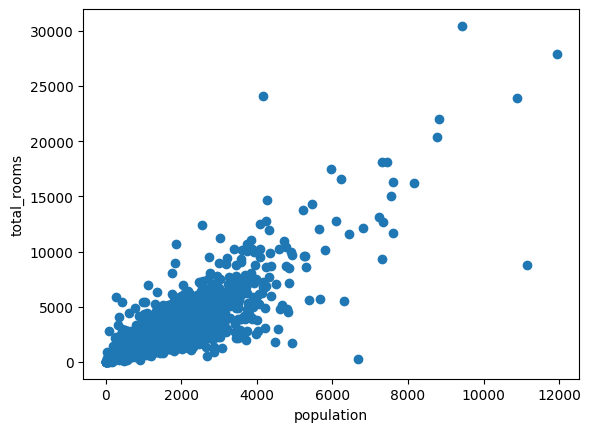

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

pop=data['population']
rooms=data['total_rooms']
plt.scatter(pop,rooms)
plt.xlabel('population')
plt.ylabel('total_rooms')
plt.show()

In [ ]:
pop_np=pop.to_numpy()
rooms_np=rooms.to_numpy()
pop_np.shape, rooms_np.shape

((3000,), (3000,))

In [ ]:
from sklearn.linear_model import LinearRegression as LR
sk_model=LR()
sk_model.fit(pop_np.reshape(3000,1),rooms_np)
sk_room_predictions = sk_model.predict(pop_np.reshape(3000,1))
sk_room_predictions.shape

(3000,)

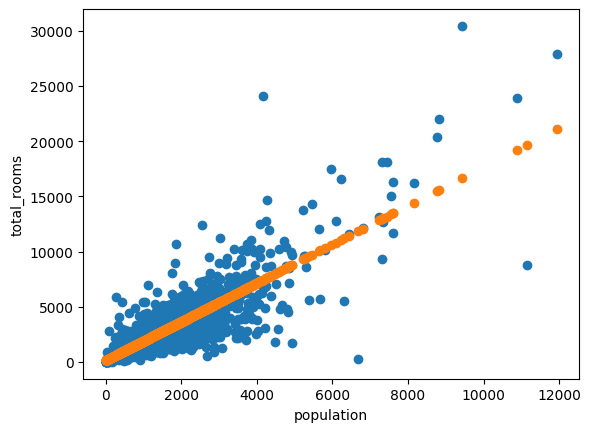

In [ ]:
pop=data['population']
rooms=data['total_rooms']
plt.scatter(pop,rooms)
plt.xlabel('population')
plt.ylabel('total_rooms')
plt.scatter(pop,sk_room_predictions)
plt.show()

In [ ]:
prediction_df = pd.DataFrame({'population' : pop, 'total_rooms' : rooms,'sk_room_predictions' : sk_room_predictions})
prediction_df

,population,total_rooms,sk_room_predictions
0,1537.0,3885.0,2835.056730
1,809.0,1510.0,1557.662340
2,1484.0,3589.0,2742.059611
3,49.0,67.0,224.118746
4,850.0,1241.0,1629.603508
...,...,...,...
2995,1258.0,1450.0,2345.505858
2996,3496.0,5257.0,6272.440810
2997,693.0,956.0,1354.121476
2998,46.0,96.0,218.854759


In [ ]:
def get_predictions(model,x):
  alpha = model['alpha']
  beta = model['beta']
  predictions = alpha + beta * x
  return predictions

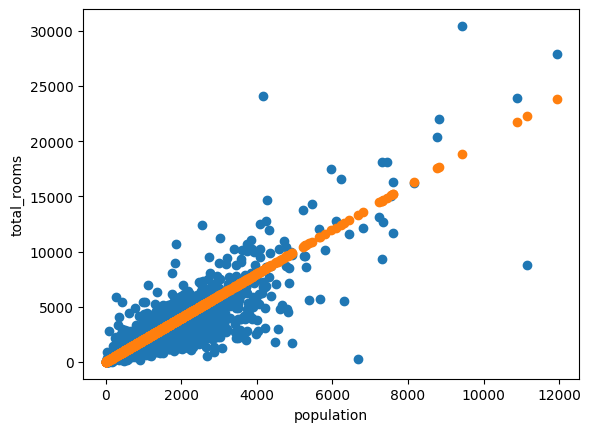

In [ ]:
model = {'alpha' : 2, 'beta' : 2}
plt.scatter(pop,rooms)
plt.xlabel('population')
plt.ylabel('total_rooms')
prediction_df['our_predictions']=get_predictions(model,pop)
plt.scatter(pop,prediction_df['our_predictions'])
plt.show()

In [ ]:
prediction_df

,population,total_rooms,sk_room_predictions,our_predictions
0,1537.0,3885.0,2835.056730,3076.0
1,809.0,1510.0,1557.662340,1620.0
2,1484.0,3589.0,2742.059611,2970.0
3,49.0,67.0,224.118746,100.0
4,850.0,1241.0,1629.603508,1702.0
...,...,...,...,...
2995,1258.0,1450.0,2345.505858,2518.0
2996,3496.0,5257.0,6272.440810,6994.0
2997,693.0,956.0,1354.121476,1388.0
2998,46.0,96.0,218.854759,94.0


In [ ]:
def mean_square_error(y,y_prediction):
  return np.sum(np.square(y-y_prediction))/len(y)
def mean_absolute_error(y,y_prediction):
  return np.sum(np.abs(y-y_prediction))/len(y)

In [ ]:
mean_square_error(rooms,sk_room_predictions), mean_square_error(rooms,prediction_df['our_predictions'])

(1376336.4283318876, 1483510.2586666667)

In [ ]:
#predicting alpha and beta using scikit formula
def get_model(x,y):
  x_bar = np.average(x)
  y_bar = np.average(y)
  top =np.sum((x-x_bar)*(y-y_bar))
  bottom = np.sum(np.square(x-x_bar))
  beta = top/bottom
  alpha = y_bar - beta * x_bar
  return {'alpha' : alpha, 'beta' : beta}

In [ ]:
x= get_model(pop_np,rooms_np)
get_predictions(x,pop_np)
prediction_df['formula_predictions']=get_predictions(x,pop_np)
prediction_df


,population,total_rooms,sk_room_predictions,our_predictions,formula_predictions
0,1537.0,3885.0,2835.056730,3076.0,2835.056730
1,809.0,1510.0,1557.662340,1620.0,1557.662340
2,1484.0,3589.0,2742.059611,2970.0,2742.059611
3,49.0,67.0,224.118746,100.0,224.118746
4,850.0,1241.0,1629.603508,1702.0,1629.603508
...,...,...,...,...,...
2995,1258.0,1450.0,2345.505858,2518.0,2345.505858
2996,3496.0,5257.0,6272.440810,6994.0,6272.440810
2997,693.0,956.0,1354.121476,1388.0,1354.121476
2998,46.0,96.0,218.854759,94.0,218.854759
